In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('fivethirtyeight')

# Loading data

In [2]:
df = pd.read_csv(filepath_or_buffer="data/avalanches.csv")
df.head(5)

RegID  RegionID    RegionName  RegionTypeId RegionTypeName  DangerLevel  \
0      0      3001  Svalbard øst            20              B            0   
1      0      3001  Svalbard øst            20              B            0   
2      0      3001  Svalbard øst            20              B            0   
3      0      3001  Svalbard øst            20              B            0   
4      0      3001  Svalbard øst            20              B            0   

             ValidFrom              ValidTo      NextWarningTime  \
0  2018-01-01T00:00:00  2018-01-01T23:59:59  2018-01-01T17:00:00   
1  2018-01-02T00:00:00  2018-01-02T23:59:59  2018-01-01T17:00:00   
2  2018-01-03T00:00:00  2018-01-03T23:59:59  2018-01-03T17:00:00   
3  2018-01-04T00:00:00  2018-01-04T23:59:59  2018-01-03T17:00:00   
4  2018-01-05T00:00:00  2018-01-05T23:59:59  2018-01-05T17:00:00   

           PublishTime  DangerIncreaseTime  NoName      MainText  LangKey  
0  2018-01-01T00:00:00                 NaN     NaN  Ikke vurdert        1  
1  2018-01-02T00:00:00                 NaN     NaN  Ikke vurdert        1  
2  2018-01-03T00:00:00                 NaN     NaN  Ikke vurdert        1  
3  2018-01-04T00:00:00                 NaN     NaN  Ikke vurdert        1  
4  2018-01-05T00:00:00                 NaN     NaN  Ikke vurdert        1

# Data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33603 entries, 0 to 33602
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RegID               33603 non-null  int64  
 1   RegionID            33603 non-null  int64  
 2   RegionName          33603 non-null  object 
 3   RegionTypeId        33603 non-null  int64  
 4   RegionTypeName      33603 non-null  object 
 5   DangerLevel         33603 non-null  int64  
 6   ValidFrom           33603 non-null  object 
 7   ValidTo             33603 non-null  object 
 8   NextWarningTime     33603 non-null  object 
 9   PublishTime         33603 non-null  object 
 10  DangerIncreaseTime  0 non-null      float64
 11  NoName              0 non-null      float64
 12  MainText            33543 non-null  object 
 13  LangKey             33603 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 3.6+ MB


As we can see, There are very few entries with null values. We will remove columns where no values are present

In [4]:
df = df.drop(columns=["DangerIncreaseTime", "NoName"])

We are not going to use the MainText in the analysis, and we do not need the name of regions. Same with date (except when the observation is form):

In [5]:
df = df.drop(columns=["RegionName", "MainText", "PublishTime", "ValidTo", "NextWarningTime", "LangKey", "RegionTypeName", "RegID"])
df

RegionID  RegionTypeId  DangerLevel            ValidFrom
0          3001            20            0  2018-01-01T00:00:00
1          3001            20            0  2018-01-02T00:00:00
2          3001            20            0  2018-01-03T00:00:00
3          3001            20            0  2018-01-04T00:00:00
4          3001            20            0  2018-01-05T00:00:00
...         ...           ...          ...                  ...
33598      3035            10            1  2021-12-27T00:00:00
33599      3035            10            1  2021-12-28T00:00:00
33600      3035            10            1  2021-12-29T00:00:00
33601      3035            10            2  2021-12-30T00:00:00
33602      3035            10            2  2021-12-31T00:00:00

[33603 rows x 4 columns]

Check if all the columns has the correct datatypes:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33603 entries, 0 to 33602
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   RegionID      33603 non-null  int64 
 1   RegionTypeId  33603 non-null  int64 
 2   DangerLevel   33603 non-null  int64 
 3   ValidFrom     33603 non-null  object
dtypes: int64(3), object(1)
memory usage: 1.0+ MB


## Data transformation
To be able to do proper data processing in the future, we would like the data to be in the correct format. Since we have timeseries data, we would need to have time as a column. This will be based on ValidFrom

In [7]:
df["ValidFrom"] = df["ValidFrom"].str.split(".", expand=True)[0]

In [8]:
df["Time"] = pd.to_datetime(df["ValidFrom"], format="%Y-%m-%dT%H:%M:%S", errors="coerce")
df = df.drop(columns=["ValidFrom"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33603 entries, 0 to 33602
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RegionID      33603 non-null  int64         
 1   RegionTypeId  33603 non-null  int64         
 2   DangerLevel   33603 non-null  int64         
 3   Time          33603 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.0 MB


In [9]:
df.describe()

RegionID  RegionTypeId   DangerLevel                 Time
count  33603.000000  33603.000000  33603.000000                33603
mean    3017.130435     11.754308      0.822665  2020-01-01 00:00:00
min     3001.000000     10.000000      0.000000  2018-01-01 00:00:00
25%     3006.000000     10.000000      0.000000  2019-01-01 00:00:00
50%     3016.000000     10.000000      0.000000  2020-01-01 00:00:00
75%     3028.000000     10.000000      2.000000  2020-12-31 00:00:00
max     3035.000000     20.000000      5.000000  2021-12-31 00:00:00
std       11.132978      3.803408      1.125195                  NaN

## Missing values
We will look into missing values.

Let's take a look into the distribution of DangerLevel, which we are trying to predict in the dataset

/tmp/ipykernel_6108/3389578067.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DangerLevel', y='Count', data=counts, palette='viridis')


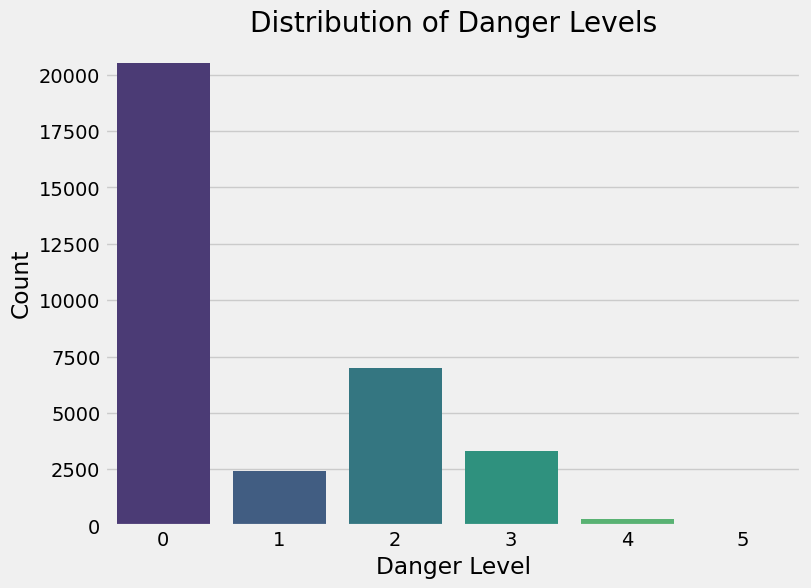

In [10]:
# Calculate the counts of each DangerLevel
counts = df['DangerLevel'].value_counts().reset_index()
counts.columns = ['DangerLevel', 'Count']

# Create the bar chart using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='DangerLevel', y='Count', data=counts, palette='viridis')
plt.title('Distribution of Danger Levels')
plt.xlabel('Danger Level')
plt.ylabel('Count')

# Show the plot
plt.show()

As we can see there are alot of 0s. These are when there is no evaluation of the DangerLevel in the dataset. These are missing values and will add no value to our future analysis, hence they will be removed. We should however note the earliest possible 0 value of a year and the latest possible one before deleting these to see when the season starts.

In [11]:
missing_danger_level_df = df[df["DangerLevel"] == 0]
# Sort each group by 'Time' in ascending order and calculate the earliest time
missing_danger_level_df['EarliestTime'] = missing_danger_level_df.groupby('RegionID')['Time'].transform('min')
missing_danger_level_df['LatestTime'] = missing_danger_level_df.groupby('RegionID')['Time'].transform('max')

# Create a new DataFrame with 'RegionID' and 'EarliestTime' columns
result_df = missing_danger_level_df[['RegionID', 'EarliestTime', 'LatestTime']].drop_duplicates().reset_index(drop=True)

result_df

/tmp/ipykernel_6108/1163861478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_danger_level_df['EarliestTime'] = missing_danger_level_df.groupby('RegionID')['Time'].transform('min')
/tmp/ipykernel_6108/1163861478.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_danger_level_df['LatestTime'] = missing_danger_level_df.groupby('RegionID')['Time'].transform('max')


RegionID EarliestTime LatestTime
0       3001   2018-01-01 2021-12-31
1       3002   2018-01-01 2021-12-31
2       3003   2018-06-01 2021-11-30
3       3004   2018-01-01 2021-12-31
4       3005   2018-01-01 2021-12-31
5       3006   2018-01-01 2021-11-30
6       3009   2018-06-01 2021-11-30
7       3010   2018-06-01 2021-11-30
8       3011   2018-06-01 2021-11-30
9       3014   2018-06-01 2021-11-30
10      3015   2018-06-01 2021-11-30
11      3016   2018-06-01 2021-11-30
12      3017   2018-06-01 2021-11-30
13      3018   2018-01-01 2021-12-31
14      3022   2018-06-01 2021-11-30
15      3023   2018-06-01 2021-11-30
16      3028   2018-06-01 2021-11-30
17      3031   2018-06-01 2021-11-30
18      3032   2018-06-01 2021-11-30
19      3034   2018-06-01 2021-11-30
20      3035   2018-06-01 2021-11-30

Disregarding some irreguralities, we see that the season starts in the beginning of december and ends in the end of may. This will be used to know when the model actually needs to predict a meaningful value

In [12]:
df = df[df["DangerLevel"] != 0]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13070 entries, 12 to 33602
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RegionID      13070 non-null  int64         
 1   RegionTypeId  13070 non-null  int64         
 2   DangerLevel   13070 non-null  int64         
 3   Time          13070 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 510.5 KB


Let's look into the danger levels of the different areas, to see if they have sort of the same distribution 

<Figure size 1000x600 with 0 Axes>

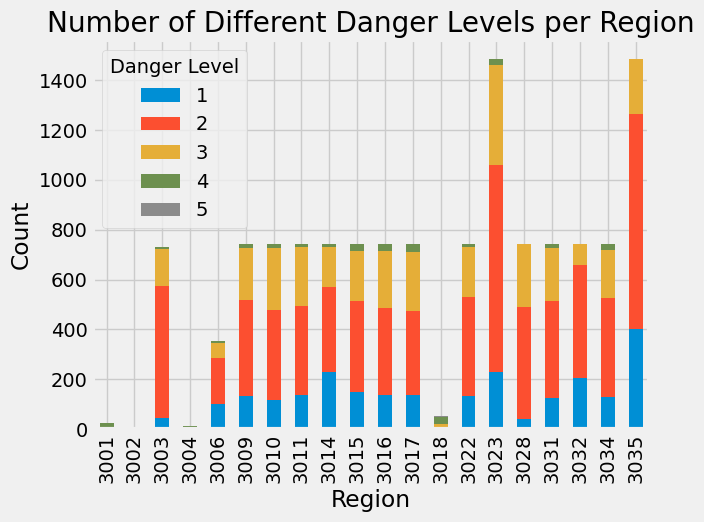

In [14]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
df.groupby('RegionID')['DangerLevel'].value_counts().unstack().plot.bar(stacked=True)

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of Different Danger Levels per Region')
plt.legend(title='Danger Level')

plt.show()


As we can see, there are some areas which has been monitored less than others. Lets look closer at these to try to see if we can get some meaningful data from them aswell

<Figure size 1000x600 with 0 Axes>

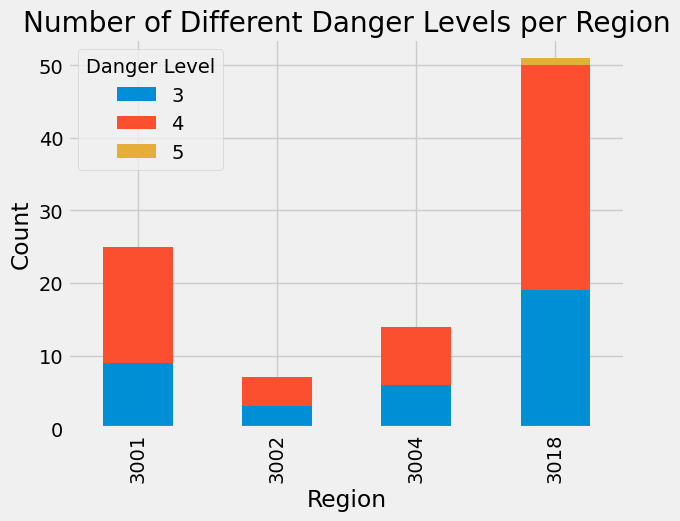

In [15]:
few_measurements_ids = [3001,3002,3004,3018]

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
df_few_measurements = df[df["RegionID"].isin(few_measurements_ids)]
df_few_measurements.groupby('RegionID')['DangerLevel'].value_counts().unstack().plot.bar(stacked=True)

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of Different Danger Levels per Region')
plt.legend(title='Danger Level')

plt.show()


It seems like these regions only report quite high levels of Danger. I regard these as outliers and remove these regions from further analysis

In [16]:
df = df[~df["RegionID"].isin(few_measurements_ids)]

<Figure size 1000x600 with 0 Axes>

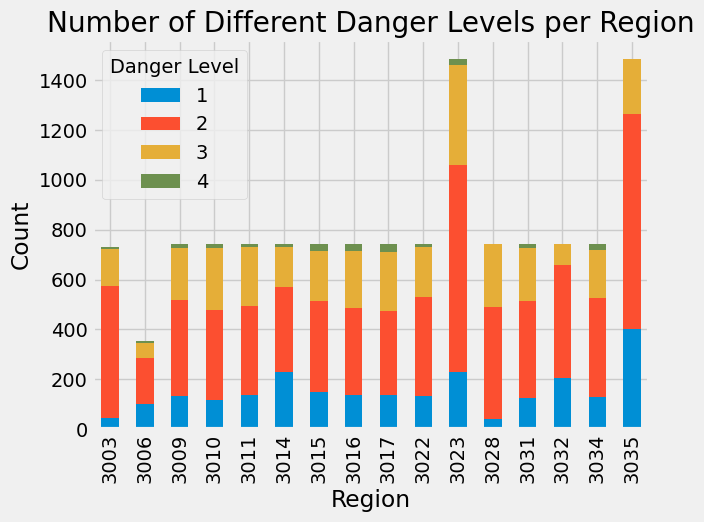

In [17]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
df.groupby('RegionID')['DangerLevel'].value_counts().unstack().plot.bar(stacked=True)

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of Different Danger Levels per Region')
plt.legend(title='Danger Level')

plt.show()


## Results of data cleaning
After removing missing values and removing outliers, we would like to see what the distrbution of the different DangerLevels are now

/tmp/ipykernel_6108/3389578067.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DangerLevel', y='Count', data=counts, palette='viridis')


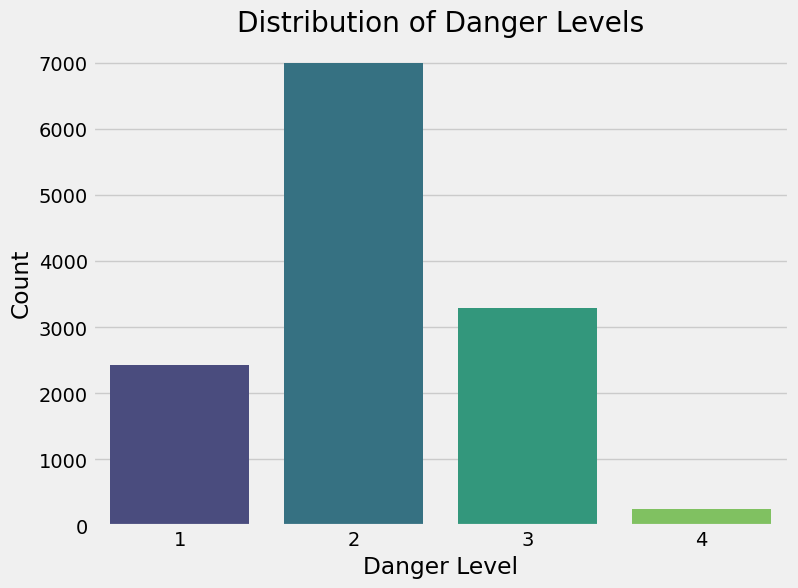

In [18]:
# Calculate the counts of each DangerLevel
counts = df['DangerLevel'].value_counts().reset_index()
counts.columns = ['DangerLevel', 'Count']

# Create the bar chart using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='DangerLevel', y='Count', data=counts, palette='viridis')
plt.title('Distribution of Danger Levels')
plt.xlabel('Danger Level')
plt.ylabel('Count')

# Show the plot
plt.show()

As we see there is quite a big imbalance in the dataset. Feeding this into a model would give it an enormous bias towards always predicting 2. To battle this we could use techniques like:
- Oversampling
- Undersampling
- SMOTE

In [19]:
df.to_csv("warnings_cleaned.csv", index=False)

# Introducing weather data

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12973 entries, 730 to 33602
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RegionID      12973 non-null  int64         
 1   RegionTypeId  12973 non-null  int64         
 2   DangerLevel   12973 non-null  int64         
 3   Time          12973 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 506.8 KB


In [21]:
weather_df = pd.read_csv("data/weather.csv")
weather_df["time"] = pd.to_datetime(weather_df["time"]).dt.date
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33603 entries, 0 to 33602
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   latitude                    33603 non-null  float64
 1   longitutde                  33603 non-null  float64
 2   elevation                   33603 non-null  float64
 3   time                        33603 non-null  object 
 4   region_id                   33603 non-null  int64  
 5   region_name                 33603 non-null  object 
 6   temp_2m_max                 33603 non-null  float64
 7   temp_2m_min                 33603 non-null  float64
 8   temp_2m_mean                33603 non-null  float64
 9   rain_sum                    33603 non-null  float64
 10  snowfall_sum                33603 non-null  float64
 11  windspeed_10m_max           33603 non-null  float64
 12  windgusts_10m_max           33603 non-null  float64
 13  winddirection_10m_dominant  336

In [22]:
df['Date'] = pd.to_datetime(df['Time']).dt.date

df['WarningKey'] = df['Date'].astype(str) + df['RegionID'].astype(str)
weather_df['WeatherKey'] = weather_df['time'].astype(str) + weather_df['region_id'].astype(str)


# Perform the join operation
total_df = weather_df.merge(df, left_on='WeatherKey', right_on='WarningKey').drop_duplicates()

# Display the merged dataframe
total_df.head()


latitude  longitutde  elevation        time  region_id        region_name  \
0      78.0   15.100006      542.0  2018-01-01       3003  Nordenskiold Land   
1      78.0   15.100006      542.0  2018-01-02       3003  Nordenskiold Land   
2      78.0   15.100006      542.0  2018-01-03       3003  Nordenskiold Land   
3      78.0   15.100006      542.0  2018-01-04       3003  Nordenskiold Land   
4      78.0   15.100006      542.0  2018-01-05       3003  Nordenskiold Land   

   temp_2m_max  temp_2m_min  temp_2m_mean  rain_sum  ...  windspeed_10m_max  \
0        -19.3        -23.0         -21.5       0.0  ...                6.9   
1        -15.7        -20.2         -17.7       0.0  ...                6.0   
2        -16.6        -19.4         -17.4       0.0  ...                5.8   
3        -18.8        -24.1         -22.0       0.0  ...                9.4   
4        -15.3        -19.5         -18.0       0.0  ...               16.4   

   windgusts_10m_max  winddirection_10m_dominant      WeatherKey RegionID  \
0               23.8                          88  2018-01-013003     3003   
1               21.2                          53  2018-01-023003     3003   
2               17.6                          75  2018-01-033003     3003   
3               20.9                         101  2018-01-043003     3003   
4               55.4                          72  2018-01-053003     3003   

   RegionTypeId  DangerLevel       Time        Date      WarningKey  
0            10            2 2018-01-01  2018-01-01  2018-01-013003  
1            10            2 2018-01-02  2018-01-02  2018-01-023003  
2            10            2 2018-01-03  2018-01-03  2018-01-033003  
3            10            2 2018-01-04  2018-01-04  2018-01-043003  
4            10            2 2018-01-05  2018-01-05  2018-01-053003  

[5 rows x 21 columns]

In [23]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12973 entries, 0 to 15943
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   latitude                    12973 non-null  float64       
 1   longitutde                  12973 non-null  float64       
 2   elevation                   12973 non-null  float64       
 3   time                        12973 non-null  object        
 4   region_id                   12973 non-null  int64         
 5   region_name                 12973 non-null  object        
 6   temp_2m_max                 12973 non-null  float64       
 7   temp_2m_min                 12973 non-null  float64       
 8   temp_2m_mean                12973 non-null  float64       
 9   rain_sum                    12973 non-null  float64       
 10  snowfall_sum                12973 non-null  float64       
 11  windspeed_10m_max           12973 non-null  float64       


In [24]:
total_df = total_df.drop(columns=["latitude", 'longitutde', 'elevation', 'WeatherKey', 'RegionID', 'RegionTypeId', 'time', 'Date', 'WarningKey'])
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12973 entries, 0 to 15943
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   region_id                   12973 non-null  int64         
 1   region_name                 12973 non-null  object        
 2   temp_2m_max                 12973 non-null  float64       
 3   temp_2m_min                 12973 non-null  float64       
 4   temp_2m_mean                12973 non-null  float64       
 5   rain_sum                    12973 non-null  float64       
 6   snowfall_sum                12973 non-null  float64       
 7   windspeed_10m_max           12973 non-null  float64       
 8   windgusts_10m_max           12973 non-null  float64       
 9   winddirection_10m_dominant  12973 non-null  int64         
 10  DangerLevel                 12973 non-null  int64         
 11  Time                        12973 non-null  datetime64[ns]


# Cleaning of total dataframe
We also would like to go through the data cleaning process on this dataframe.

## Data transformation
We will set the correct index for the dataframe. This will be done by combining the Time and region_id columns, which should make it unique

In [25]:
total_df = total_df.set_index(['region_id', 'Time'], drop=False)


In [26]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12973 entries, (3003, Timestamp('2018-01-01 00:00:00')) to (3035, Timestamp('2021-12-31 00:00:00'))
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   region_id                   12973 non-null  int64         
 1   region_name                 12973 non-null  object        
 2   temp_2m_max                 12973 non-null  float64       
 3   temp_2m_min                 12973 non-null  float64       
 4   temp_2m_mean                12973 non-null  float64       
 5   rain_sum                    12973 non-null  float64       
 6   snowfall_sum                12973 non-null  float64       
 7   windspeed_10m_max           12973 non-null  float64       
 8   windgusts_10m_max           12973 non-null  float64       
 9   winddirection_10m_dominant  12973 non-null  int64         
 10  DangerLevel                 12973 non-null  

## Anomaly detection

/tmp/ipykernel_6108/1887145653.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['Month'] = total_df['Time'].dt.month


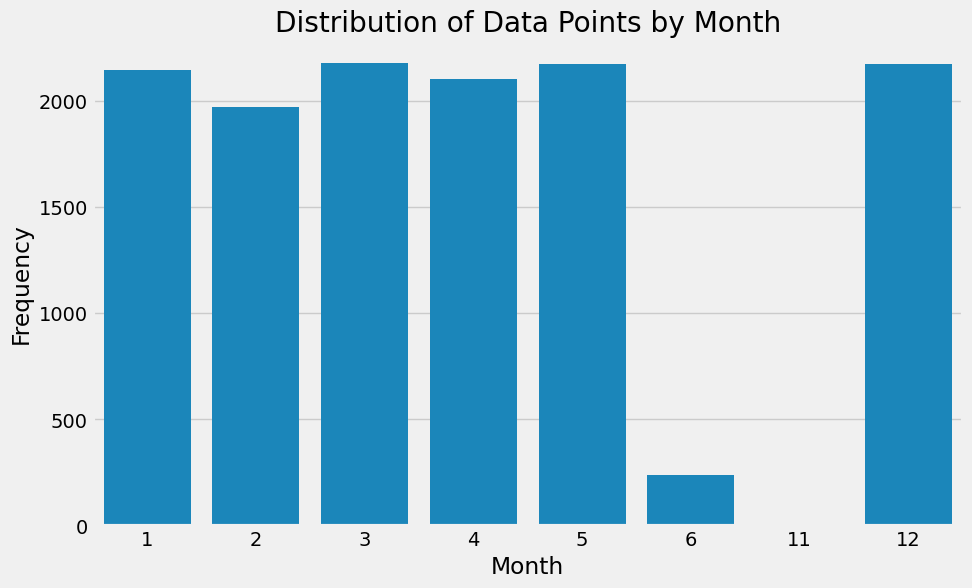

In [27]:
# Extract the month from the 'Time' column
plot_df = total_df[['Time']]
plot_df['Month'] = total_df['Time'].dt.month

# Create a countplot to visualize the distribution of data points by month
plt.figure(figsize=(10, 6))
sns.countplot(data=plot_df, x='Month')
plt.title('Distribution of Data Points by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

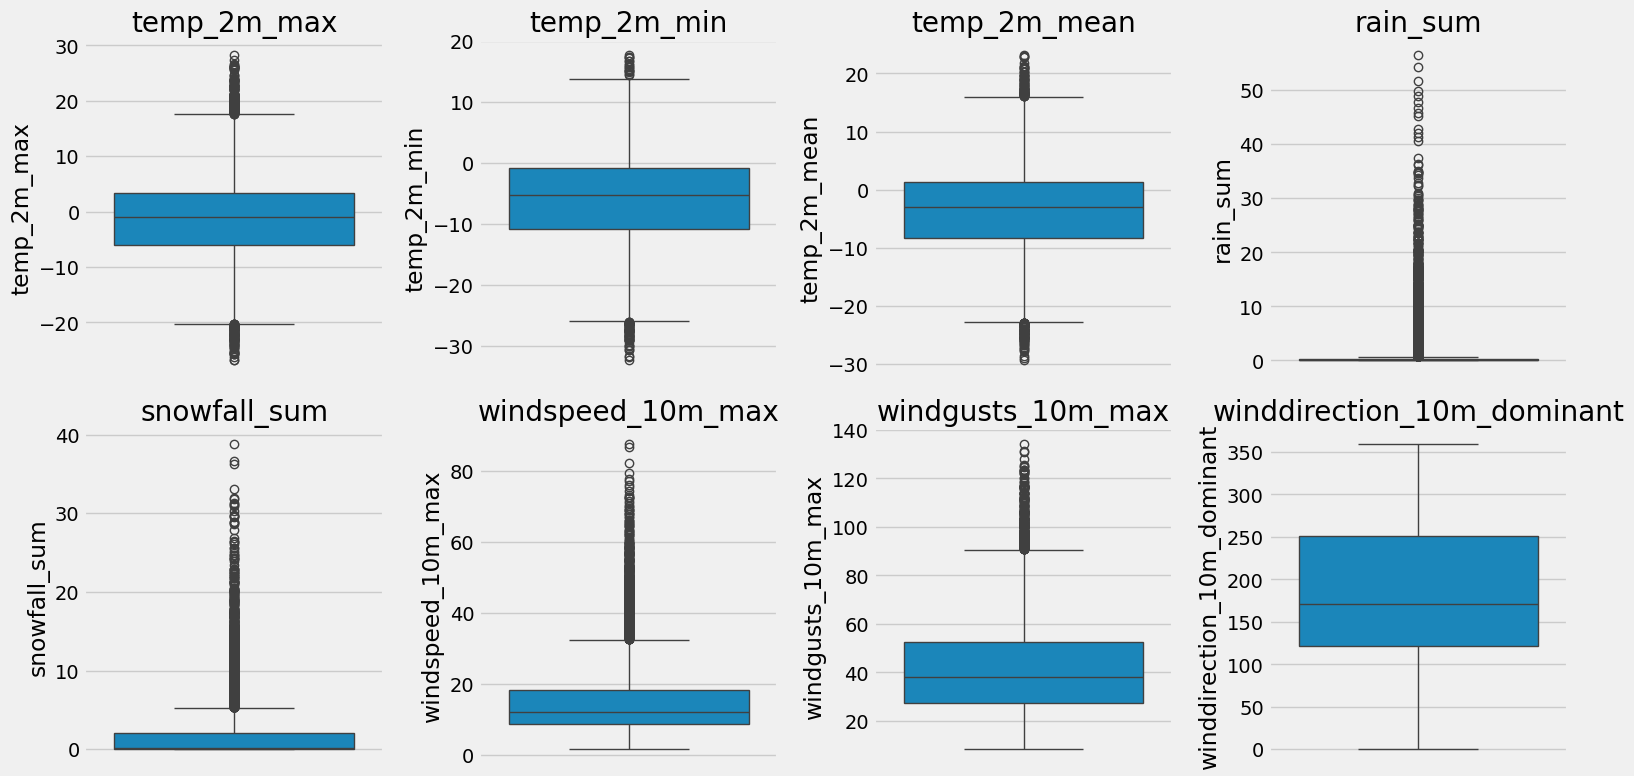

In [28]:
# Assuming your DataFrame is called df
variables_to_plot = [
    'temp_2m_max',
    'temp_2m_min',
    'temp_2m_mean',
    'rain_sum',
    'snowfall_sum',
    'windspeed_10m_max',
    'windgusts_10m_max',
    'winddirection_10m_dominant'
]

# Create subplots for each variable
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.subplots_adjust(wspace=0.5)

for i, var in enumerate(variables_to_plot):
    row = i // 4
    col = i % 4
    sns.boxplot(data=total_df, y=var, ax=axes[row, col])
    axes[row, col].set_title(var)

plt.tight_layout()
plt.show()

This gives us insights into which variables would be interesting to look more into:
- rain_sum
- snowfall_sum
- windspeed_10m_max

# Saving the dataframe

In [29]:
total_df.to_csv("weather_warning_combined.csv", index=False)